In [4]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import pandas as pd

# 1. Total Survey Error.

> Using the normal approximation to the binomial distribution, confirm that the 95%
confidence interval for the sampling error for sample size 1000 and percentage outcome
10% is 2% (rounded to the nearest integer). Also, motivate why it is appropriate to use
the binomial distribution here.

A binomial counts discrete successes, which here represents a respondent selecting a candidate. 

(0.028402576508932555, 0.028402576508932555)

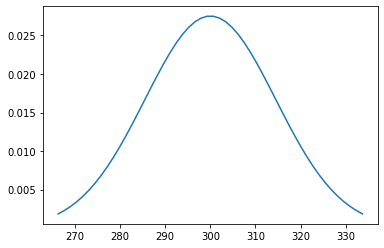

In [9]:
# A binomial B(n,p) is approximated by the normal with N(np, npq)

n = 1000
p = 0.3
q = 1 - p

# Crucial step: we have a finicky scale parameter
binom = sts.binom
norm = sts.norm(loc =n*p, scale = np.sqrt(n*p*q))

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99))
plt.plot(x, norm.pdf(x))

lower, upper = abs(norm.ppf(0.975) - n*p)/n,  abs(norm.ppf(0.025) - n*p)/n

lower,upper

#print("{0:.0%}".format(lower), "{0:.0%}".format(upper))

## Write a function

> Write a Python function for calculating the 95% confidence interval given any sample
size and any percentage outcome. Use your function to calculate all the values in the
Total Survey Error table rounded to the nearest integer. For which entries does your
margin of error differ from the value in the table?

In [6]:
def binom_conf(n,p):
    q = 1 - p
    norm = sts.norm(loc = p, scale = np.sqrt(p*q/n))
    lower, upper = abs(norm.ppf(0.975) - n*p)/n,  abs(norm.ppf(0.025) - n*p)/n

    return "{0:.0%}".format(lower)

In [7]:
percents = np.arange(10,100, 10)
samples = np.array([100, 250, 500, 750, 1000])[::-1]

percents_ = {k:[] for k in percents}

for p in percents:
    for s in samples:
        # percent to prob
        prob = p/100

        percents_[p].append(binom_conf(s,prob))

pew = pd.DataFrame(percents_)
pew = pew.T
pew.columns = samples

pew

,1000,750,500,250,100
10,10%,10%,10%,10%,10%
20,20%,20%,20%,20%,20%
30,30%,30%,30%,30%,30%
40,40%,40%,40%,40%,40%
50,50%,50%,50%,50%,49%
60,60%,60%,60%,60%,59%
70,70%,70%,70%,70%,69%
80,80%,80%,80%,80%,79%
90,90%,90%,90%,90%,89%


# 3. Where do these errors come from?

It looks like some might come from rounding error. 